<a href="https://colab.research.google.com/github/anandgvb/Cancer_Wisconsin-Diagnostic-Data/blob/master/cancer_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [0]:
del df['Unnamed: 32']
del df['id']

In [0]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

In [0]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

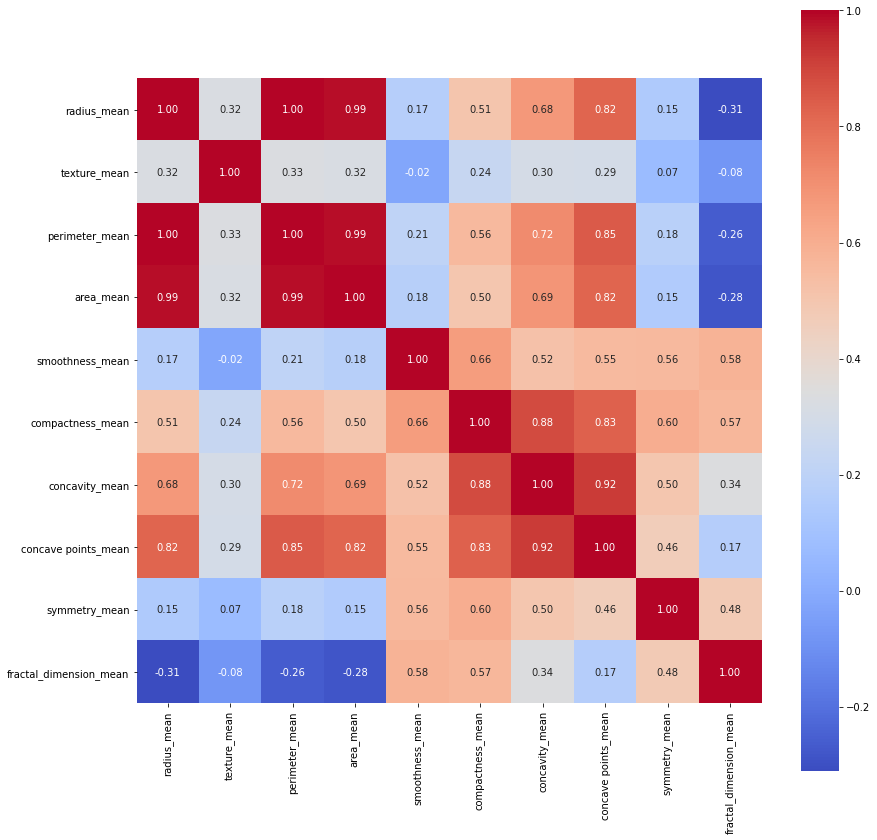

In [6]:
corrn = df[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corrn, cbar = True,  square = True, annot=True, fmt= '.2f',
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [0]:
#compactness,concave_points,concativity: select compactness
#radius,perimeter,area: select perimeter
#omit fractal_dimension : less correlated 
diction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
x=df[diction_var]
y = df['diagnosis']

In [0]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test =train_test_split(x,y,test_size=0.2,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)



In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(x_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(15, activation="relu", input_shape=[5]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

In [0]:
model.compile(loss="CategoricalHinge", 
              optimizer=keras.optimizers.SGD(lr=0.1), 
              metrics=['accuracy'])

In [187]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
11/11 [==============================] - 0s 12ms/step - loss: 0.8035 - accuracy: 0.5924 - val_loss: 0.5306 - val_accuracy: 0.8509
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 0.3798 - accuracy: 0.8827 - val_loss: 0.3068 - val_accuracy: 0.8070
Epoch 3/40
11/11 [==============================] - 0s 5ms/step - loss: 0.2139 - accuracy: 0.9179 - val_loss: 0.2235 - val_accuracy: 0.9035
Epoch 4/40
11/11 [==============================] - 0s 5ms/step - loss: 0.1852 - accuracy: 0.9120 - val_loss: 0.2139 - val_accuracy: 0.8947
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 0.1708 - accuracy: 0.9208 - val_loss: 0.2015 - val_accuracy: 0.9123
Epoch 6/40
11/11 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9267 - val_loss: 0.1975 - val_accuracy: 0.9123
Epoch 7/40
11/11 [==============================] - 0s 5ms/step - loss: 0.1511 - accuracy: 0.9355 - val_loss: 0.1895 - val_accuracy: 0.9035
Epoch 8/40
11/11 [=

In [188]:
from sklearn.model_selection import train_test_split
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores[1]

accuracy: 97.37%


0.9736841917037964